In [10]:
# Load the dataset
df = pd.read_excel("IPL sample data.xlsx", sheet_name="Sheet1")

# Display the first few rows of the dataset
print(df.head())

    Pick                                                Y->  Clean Pick  \
0  Throw                                                Y->  Good Throw   
1   Runs  "+" stands for runs saved "-" stands for runs ...         NaN   
2    NaN                                                NaN         NaN   
3    NaN                                          Match No.     Innings   
4    NaN                                            IPL2367           1   

              N->         Fumble        C->             Catch  DC->  \
0             N->      Bad throw       DH->         Dirct Hit  RO->   
1             NaN            NaN        NaN               NaN   NaN   
2             NaN            NaN        NaN               NaN   NaN   
3           Teams    Player Name  BallCount          Position  Pick   
4  Delhi Capitals  Rilee russouw        0.1  Short mid wicket     n   

  Dropped Catch   S->       Stumping Unnamed: 11          Unnamed: 12  
0       Run Out  MR->  Missed Runout         NaN  

In [11]:
# Load the dataset
df = pd.read_excel("IPL sample data.xlsx", sheet_name="Sheet1")

# Display the first few rows of the dataset
print(df.head())

    Pick                                                Y->  Clean Pick  \
0  Throw                                                Y->  Good Throw   
1   Runs  "+" stands for runs saved "-" stands for runs ...         NaN   
2    NaN                                                NaN         NaN   
3    NaN                                          Match No.     Innings   
4    NaN                                            IPL2367           1   

              N->         Fumble        C->             Catch  DC->  \
0             N->      Bad throw       DH->         Dirct Hit  RO->   
1             NaN            NaN        NaN               NaN   NaN   
2             NaN            NaN        NaN               NaN   NaN   
3           Teams    Player Name  BallCount          Position  Pick   
4  Delhi Capitals  Rilee russouw        0.1  Short mid wicket     n   

  Dropped Catch   S->       Stumping Unnamed: 11          Unnamed: 12  
0       Run Out  MR->  Missed Runout         NaN  

In [13]:
# Drop unnecessary rows and columns
df = df.dropna(how="all")  # Drop rows with all NaN values
df = df.reset_index(drop=True)

# Rename columns for easier access
# The original DataFrame has 13 columns, but you're providing 12 new column names.
# Add the missing column name or adjust the new column names to match the existing number of columns.
df.columns = [
    "Match No.", "Innings", "Teams", "Player Name", "BallCount", "Position",
    "Pick", "Throw", "Runs", "Overcount", "Venue", "Stadium", "Extra Column Name" # Added a placeholder for the missing column
]

# Fill missing values with 0 or appropriate defaults
df["Runs"] = df["Runs"].fillna(0)
df["Pick"] = df["Pick"].fillna("N")
df["Throw"] = df["Throw"].fillna("N")

# Display cleaned data
print(df.head())

  Match No.                                            Innings       Teams  \
0     Throw                                                Y->  Good Throw   
1      Runs  "+" stands for runs saved "-" stands for runs ...         NaN   
2       NaN                                          Match No.     Innings   
3       NaN                                            IPL2367           1   
4       NaN                                            IPL2367           1   

      Player Name      BallCount   Position              Pick Throw     Runs  \
0             N->      Bad throw       DH->         Dirct Hit  RO->  Run Out   
1             NaN            NaN        NaN                 N     N        0   
2           Teams    Player Name  BallCount          Position  Pick    Throw   
3  Delhi Capitals  Rilee russouw        0.1  Short mid wicket     n        0   
4  Delhi Capitals      Phil Salt        0.2     wicket keeper     Y        Y   

  Overcount          Venue Stadium    Extra Column

In [18]:
# Define weights for each metric
weights = {
    "CP": 1,  # Clean Picks
    "GT": 1,  # Good Throws
    "C": 3,   # Catches
    "DC": -3, # Dropped Catches
    "ST": 3,  # Stumpings
    "RO": 3,  # Run Outs
    "MRO": -2,# Missed Run Outs
    "DH": 2,  # Direct Hits
}

# Initialize a dictionary to store performance scores
performance_scores = {}

# Iterate through each player and calculate their PS
for player in df["Player Name"].unique():
    if pd.isna(player):
        continue

    # Filter data for the current player
    player_data = df[df["Player Name"] == player]

    # Calculate metrics
    CP = player_data[player_data["Pick"] == "Y"].shape[0]  # Clean Picks
    GT = player_data[player_data["Throw"] == "Y"].shape[0]  # Good Throws
    C = player_data[player_data["Pick"] == "C"].shape[0]    # Catches
    DC = player_data[player_data["Pick"] == "DC"].shape[0]  # Dropped Catches
    ST = player_data[player_data["Throw"] == "S"].shape[0]  # Stumpings
    RO = player_data[player_data["Throw"] == "RO"].shape[0] # Run Outs
    MRO = player_data[player_data["Throw"] == "MR"].shape[0]# Missed Run Outs
    DH = player_data[player_data["Throw"] == "DH"].shape[0] # Direct Hits

    # Convert "Runs" column to numeric, handling errors by coercing non-numeric values to NaN
    player_data["Runs"] = pd.to_numeric(player_data["Runs"], errors='coerce')

    # Calculate Runs Saved, ensuring you only sum numeric values by filling NaNs with 0
    RS = player_data["Runs"].fillna(0).sum()  # Runs Saved - ensure you are summing numeric values


    # Calculate Performance Score
    PS = (
        (CP * weights["CP"]) + (GT * weights["GT"]) + (C * weights["C"]) +
        (DC * weights["DC"]) + (ST * weights["ST"]) + (RO * weights["RO"]) +
        (MRO * weights["MRO"]) + (DH * weights["DH"]) + RS
    )

    # Store the score
    performance_scores[player] = PS

# Convert the dictionary to a DataFrame for visualization
performance_df = pd.DataFrame(list(performance_scores.items()), columns=["Player Name", "Performance Score"])

# Display the performance scores
print(performance_df)

        Player Name  Performance Score
0               N->                0.0
1             Teams                0.0
2    Delhi Capitals                8.0
3  Good Throws (GT)                0.0
4                 1                1.0
5                 2                0.0
6                 3                0.0
7                 0                0.0


<ipython-input-18-1012f3cae39f>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data["Runs"] = pd.to_numeric(player_data["Runs"], errors='coerce')


<ipython-input-19-79cb9de08493>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Player Name", y="Performance Score", data=performance_df, palette="viridis")


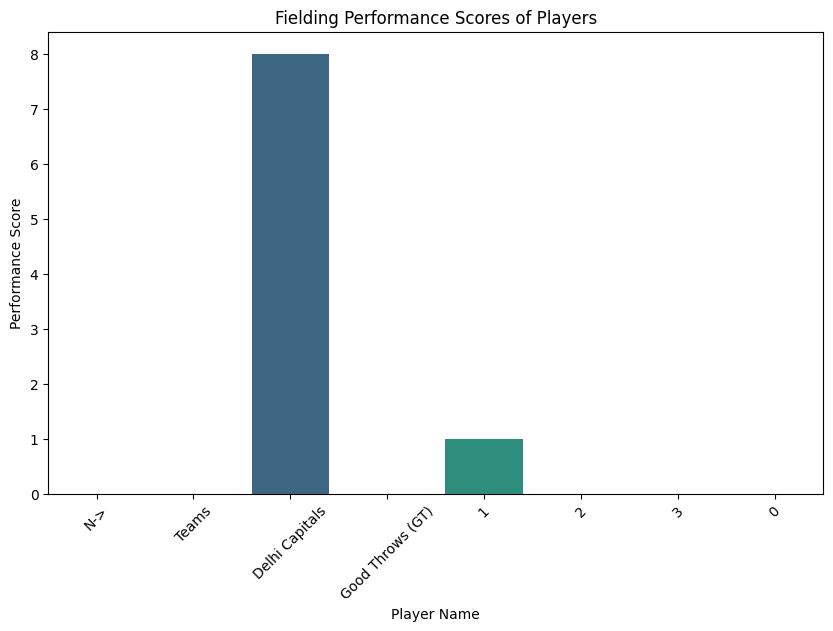

In [19]:
# Plot performance scores
plt.figure(figsize=(10, 6))
sns.barplot(x="Player Name", y="Performance Score", data=performance_df, palette="viridis")
plt.title("Fielding Performance Scores of Players")
plt.xlabel("Player Name")
plt.ylabel("Performance Score")
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-276f8dc651c9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Position", y="Runs", data=position_runs, palette="magma")


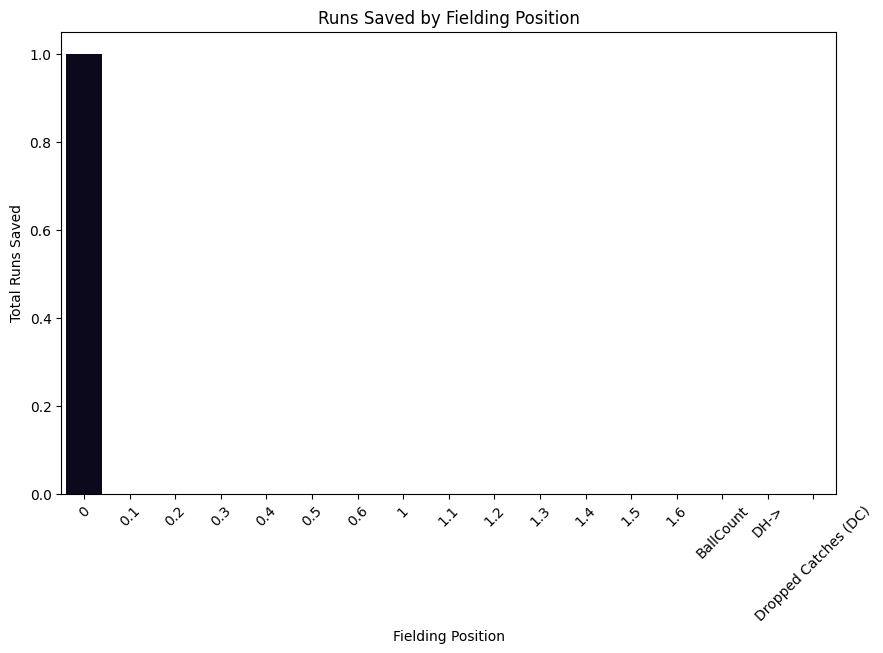

In [21]:
# Group by position and calculate total runs saved
# Ensure 'Runs' column is numeric before grouping
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN
df['Runs'] = df['Runs'].fillna(0) # Fill NaN with 0
position_runs = df.groupby("Position")["Runs"].sum().reset_index()

# Plot runs saved by position
plt.figure(figsize=(10, 6))
sns.barplot(x="Position", y="Runs", data=position_runs, palette="magma")
plt.title("Runs Saved by Fielding Position")
plt.xlabel("Fielding Position")
plt.ylabel("Total Runs Saved")
plt.xticks(rotation=45)
plt.show()

In [22]:
# Save performance scores to a CSV file
performance_df.to_csv("fielding_performance_scores.csv", index=False)